In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('../data/best selling site#1 - 11teamsports.cz.csv', index_col=0)


In [3]:
df

,total_revenue
date,
2019-06-01,1743.319764
2019-06-03,554.969767
2019-06-04,12318.476325
2019-06-05,24104.458469
2019-06-06,5252.234095
...,...
2022-01-10,10959.742608
2022-01-11,10468.838735
2022-01-12,9520.911211


In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df = df.resample('d').sum()

In [7]:
df

,total_revenue
date,
2019-06-01,1743.319764
2019-06-02,0.000000
2019-06-03,554.969767
2019-06-04,12318.476325
2019-06-05,24104.458469
...,...
2022-01-10,10959.742608
2022-01-11,10468.838735
2022-01-12,9520.911211


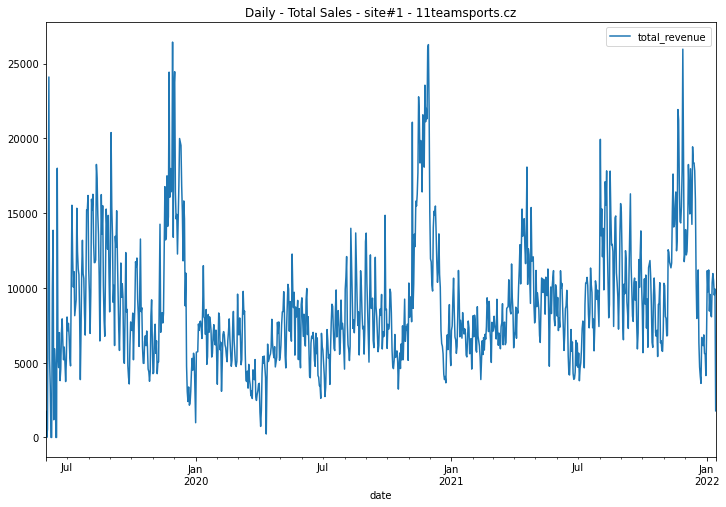

In [8]:
plt.rcParams["figure.figsize"] = (12, 8)
df.plot()
plt.title('Daily - Total Sales - site#1 - 11teamsports.cz')
plt.show()

In [9]:
# Check for stationery 

from statsmodels.tsa.stattools import adfuller

X = df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

    
    


ADF Statistic: -5.345141
p-value: 0.000004
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


In [9]:
from pmdarima.arima.utils import ndiffs

ndiffs(df, test='adf')

# to select d#

0

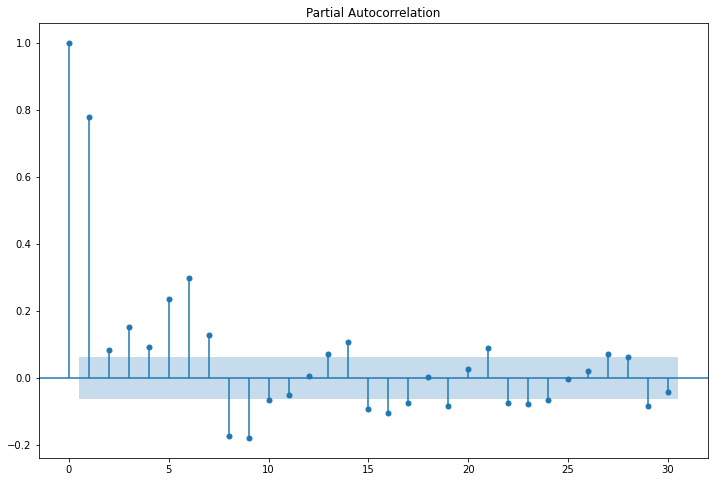

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df);

# to get the p#

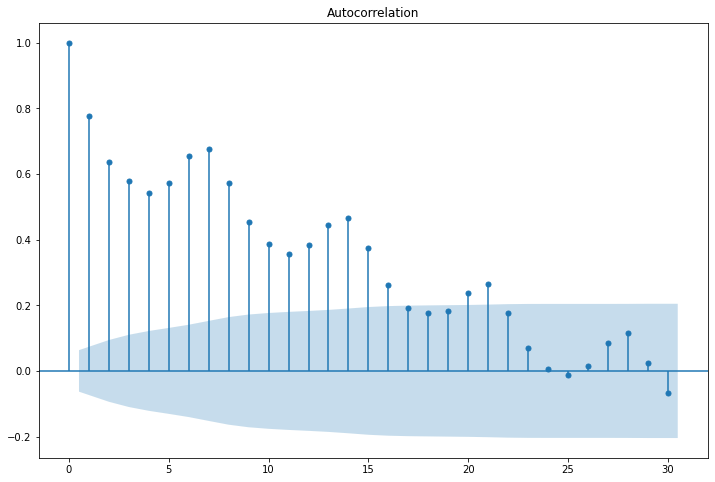

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df);

# to get the q#

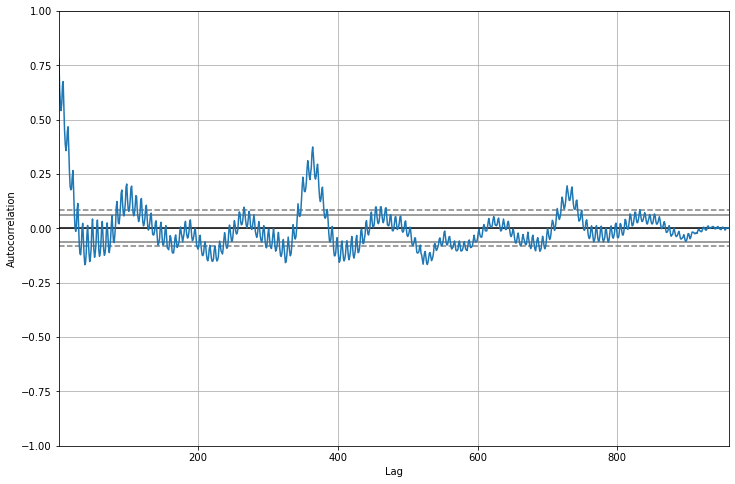

In [12]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(X)
plt.show()

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


model = ARIMA(X, order=(12,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  959
Model:                ARIMA(12, 0, 1)   Log Likelihood               -8775.763
Date:                Thu, 17 Feb 2022   AIC                          17581.526
Time:                        22:59:08   BIC                          17654.514
Sample:                             0   HQIC                         17609.323
                                - 959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8880.6082    721.513     12.308      0.000    7466.470    1.03e+04
ar.L1          0.9421      0.222      4.235      0.000       0.506       1.378
ar.L2         -0.1572      0.120     -1.312      0.1

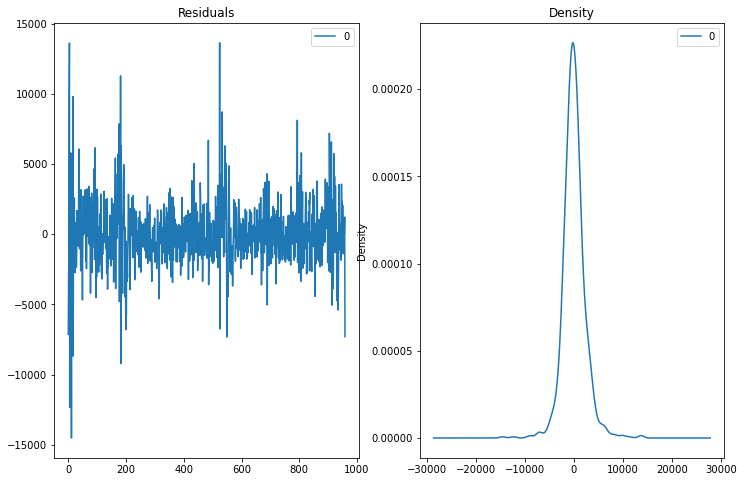

In [12]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [13]:
X = df.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(12, 0, 1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)



predicted=6871.100316, expected=7078.456180


C:\Users\Sujan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=7742.864739, expected=8713.021293


C:\Users\Sujan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9160.900874, expected=6633.067811
predicted=7625.390857, expected=8613.310827
predicted=7331.239827, expected=8307.648039
predicted=6655.298867, expected=10030.149586
predicted=8456.651050, expected=11248.199586
predicted=10296.689056, expected=12886.810824
predicted=11397.000464, expected=10267.035632
predicted=10196.935936, expected=12644.800742
predicted=11326.190459, expected=15275.372055
predicted=12863.312312, expected=13460.646869
predicted=13172.476798, expected=13715.497646
predicted=14221.664404, expected=14626.383687
predicted=13291.859316, expected=12770.820509
predicted=12392.459888, expected=11623.341059
predicted=12609.604758, expected=13795.035622
predicted=13683.987283, expected=18083.112749
predicted=15258.434384, expected=10234.107337
predicted=12053.202017, expected=12614.142607


C:\Users\Sujan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12706.478216, expected=12224.107335
predicted=10315.189741, expected=10494.530600
predicted=11083.125814, expected=8963.744164
predicted=11714.726044, expected=15376.681749
predicted=13665.528820, expected=11788.881364
predicted=10686.959872, expected=11953.627877
predicted=11544.290230, expected=12075.960051
predicted=10851.677263, expected=8881.902303
predicted=8570.566509, expected=7658.508120
predicted=10011.178401, expected=7978.064707
predicted=9815.223718, expected=11166.962373
predicted=10869.926271, expected=8748.774396
predicted=9260.154111, expected=9666.450366
predicted=9514.017154, expected=9119.748039
predicted=7141.853191, expected=8546.163545
predicted=7713.565332, expected=6815.145720
predicted=8096.454103, expected=6351.951920
predicted=8132.955499, expected=8366.652694
predicted=8615.834846, expected=10663.117415
predicted=9449.808694, expected=10525.122068
predicted=9723.635301, expected=9696.048813
predicted=8689.128568, expected=10578.421292
predicted=87

C:\Users\Sujan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9660.797638, expected=9356.591834
predicted=8958.810552, expected=7146.102303
predicted=6783.130515, expected=8001.668970
predicted=7832.847547, expected=7368.894936
predicted=8263.075067, expected=11146.632526
predicted=10105.593973, expected=10004.043381
predicted=9364.629541, expected=10296.275548
predicted=9642.622441, expected=8753.747648
predicted=8147.403299, expected=7229.714706
predicted=7578.910443, expected=5818.375953
predicted=7782.713659, expected=6873.634862
predicted=8431.406808, expected=8610.804238
predicted=9175.663230, expected=8788.190674
predicted=8531.035266, expected=9839.451912
predicted=8550.375142, expected=8401.446486
predicted=6857.392920, expected=5471.781766
predicted=6047.902956, expected=4213.855023
predicted=5992.226694, expected=4178.519752
predicted=6371.099271, expected=5771.832537
predicted=7336.532997, expected=7217.669746
predicted=7711.396656, expected=5766.037194
predicted=5856.038530, expected=6383.822465
predicted=4923.772143, expec

C:\Users\Sujan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5780.416727, expected=4990.969756
predicted=5553.404108, expected=5875.079443
predicted=5815.586046, expected=7264.372463
predicted=6515.492358, expected=7783.623625
predicted=6511.730147, expected=7583.927884
predicted=6838.976528, expected=4654.722467
predicted=5476.814045, expected=8892.632538
predicted=8027.829985, expected=10325.232920
predicted=8991.594114, expected=10340.834082
predicted=10540.404780, expected=10704.789897
predicted=10318.352743, expected=10138.806179
predicted=8785.743232, expected=8231.636026
predicted=8073.167630, expected=7327.863161
predicted=8825.237853, expected=8331.381760
predicted=9731.006922, expected=11328.888735
predicted=10827.063493, expected=10216.579439
predicted=10329.836690, expected=9705.077108
predicted=9206.299151, expected=7336.028662
predicted=6920.194399, expected=7924.633315
predicted=7390.849837, expected=5788.810839
predicted=7489.850771, expected=7337.277114
predicted=9108.008753, expected=10470.279042
predicted=9838.200718

C:\Users\Sujan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6543.037587, expected=5820.684093


C:\Users\Sujan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6462.530826, expected=5755.660060
predicted=7705.409825, expected=7164.434860


C:\Users\Sujan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8609.831256, expected=10307.752300
predicted=9093.847013, expected=10153.670902
predicted=8237.760206, expected=8080.794941
predicted=7095.668463, expected=7964.579823
predicted=7238.803394, expected=6789.036414
predicted=6959.194224, expected=6816.141067
predicted=8641.775975, expected=12551.688726
predicted=11854.351014, expected=12388.964696
predicted=11361.376578, expected=11732.798028
predicted=10618.225548, expected=11528.367019
predicted=9500.544416, expected=11341.522057
predicted=9182.331208, expected=11667.444537
predicted=11348.171850, expected=15065.077087
predicted=14986.124726, expected=17617.518939
predicted=16075.784528, expected=14072.883678
predicted=13817.963787, expected=14216.777094
predicted=13133.744732, expected=15563.435997
predicted=12827.033629, expected=16415.193751
predicted=15085.566666, expected=12481.372054
predicted=15159.416620, expected=13309.261974
predicted=14789.570062, expected=21927.566598
predicted=16779.675160, expected=21212.118926
p

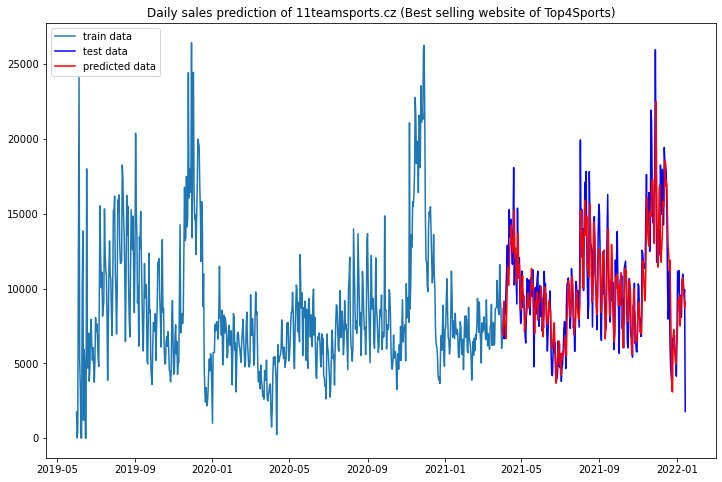

In [14]:
# plot forecasts against actual outcomes

plt.plot(df[:size].index, train, label='train data')
plt.plot(df[size:].index, test, color='blue', label='test data')
plt.plot(df[size:].index, predictions, color='red', label='predicted data')
plt.legend(loc="upper left")
plt.title('Daily sales prediction of 11teamsports.cz (Best selling website of Top4Sports)')
plt.show()

In [15]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



mape=mean_absolute_percentage_error(test, predictions)
print('MAPE: ', mape)

MAPE:  43.05646963571917


In [27]:
forecast = model_fit.forecast(steps=30)


day=1
for yhat in forecast:
    print('day {}: {}'.format(day,yhat))
    day +=  1

day 1: 9116.968140273924
day 2: 9080.707227768406
day 3: 10311.92884629957
day 4: 10620.456363612459
day 5: 10224.722731530153
day 6: 9790.268972702503
day 7: 9339.511335306906
day 8: 9040.118645583045
day 9: 9245.351373219797
day 10: 9859.383782230027
day 11: 10052.68816353287
day 12: 9860.61478366466
day 13: 9486.002808585768
day 14: 9061.483254696435
day 15: 8923.57293820735
day 16: 9172.501602647382
day 17: 9542.42734142378
day 18: 9703.91035204523
day 19: 9569.13118715505
day 20: 9249.508644323821
day 21: 8941.412817567385
day 22: 8883.375035859837
day 23: 9089.244148730146
day 24: 9355.402490469578
day 25: 9472.332639420065
day 26: 9359.331129393933
day 27: 9101.495557231188
day 28: 8886.307904801408
day 29: 8866.024869892351
day 30: 9030.615521635586


In [17]:
# Hypertuning the parameters

import warnings
warnings.filterwarnings("ignore")

In [18]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.7)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
    
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
        
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [19]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    

In [24]:
# evaluate parameters
p_values = [9,10,11,12,13]
d_values = range(0, 1)
q_values = range(1, 2)
warnings.filterwarnings("ignore")
evaluate_models(df.values, p_values, d_values, q_values)


ARIMA(9, 0, 1) MSE=4585044.734
ARIMA(10, 0, 1) MSE=4582573.801
ARIMA(11, 0, 1) MSE=4545419.347
ARIMA(12, 0, 1) MSE=4542816.031
Best ARIMA(12, 0, 1) MSE=4542816.031
